In [57]:
import pandas as pd
import numpy as np
df=pd.read_csv("indian movies.csv")

# Replacing '-' with Nan

In [58]:
df=df.replace('-',np.nan)
df.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,NaN,NaN,NaN,NaN,hindi
1,tt1702558,Nadir Khan,1968,NaN,NaN,NaN,NaN,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,NaN,2.2,20,NaN,urdu
4,tt0049595,Parivar,1956,NaN,7.4,21,"Comedy, Drama, Family",hindi


# Extracting Numeric Duration from "Timing(min)" Column and Converting to Integer

In [59]:
df["Timing(min)"] = df["Timing(min)"].str.extract(r"(\d+)").astype(float).astype("Int64")

# Encoding Language Labels into Numeric Format

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['language_encoded']=le.fit_transform(df['Language'])
df.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,language_encoded
0,tt0398974,Dr. Shaitan,1960,<NA>,NaN,NaN,NaN,hindi,4
1,tt1702558,Nadir Khan,1968,<NA>,NaN,NaN,NaN,urdu,18
2,tt0493437,Apna Sapna Money Money,2006,134,5.3,"1,892","Comedy, Musical, Romance",hindi,4
3,tt0273405,Aag Aur Sholay,1987,<NA>,2.2,20,NaN,urdu,18
4,tt0049595,Parivar,1956,<NA>,7.4,21,"Comedy, Drama, Family",hindi,4


# Creating Dummy Genre Columns

In [62]:
df.fillna({
    'Genre':'Others'
},inplace=True)
Genre_dummies = df['Genre'].str.get_dummies(sep= ', ')
df = pd.concat([df, Genre_dummies], axis=1)
Genre_dummies.head()

,Action,Action,Adventure,Adventure,Animation,Animation,Biography,Biography,Comedy,Comedy,...,Sci-Fi,Short,Short,Sport,Sport,Talk-Show,Thriller,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df.head(13)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,language_encoded,Action,...,Sci-Fi,Short,Short,Sport,Sport,Talk-Show,Thriller,Thriller,War,Western
0,tt0398974,Dr. Shaitan,1960,<NA>,NaN,NaN,Others,hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
1,tt1702558,Nadir Khan,1968,<NA>,NaN,NaN,Others,urdu,18,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0493437,Apna Sapna Money Money,2006,134,5.3,"1,892","Comedy, Musical, Romance",hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0273405,Aag Aur Sholay,1987,<NA>,2.2,20,Others,urdu,18,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0049595,Parivar,1956,<NA>,7.4,21,"Comedy, Drama, Family",hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
5,tt2930026,Humraah: The Traitor,2008,<NA>,NaN,NaN,Thriller,hindi,4,0,...,0,0,0,0,0,0,0,1,0,0
6,tt6597160,Jacqueline I Am Coming,2019,112,7.9,16,Drama,hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
7,tt0829459,A Mighty Heart,2007,108,6.6,"26,885","Biography, Drama, History",urdu,18,0,...,0,0,0,0,0,0,0,0,0,0
8,tt0154875,Midnight Mail,1939,<NA>,NaN,NaN,Action,hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0364628,Raktalekha,1992,175,6.3,12,Drama,bengali,1,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning and Extracting Year Values from the "Year" Column

In [64]:
import pandas as pd
import numpy as np

df['Year'] = df['Year'].apply(lambda x: np.nan if pd.isna(x) or x == '-' else int(str(x).strip().split()[0]) if str(x).strip().split()[0].isdigit() else np.nan)


# Cleaning and Converting "Votes" Column to Numeric Format

In [65]:
df['Votes'] = df['Votes'].apply(lambda x: np.nan if pd.isna(x) or x == '-' else float(str(x).replace(',', '').strip()) if str(x).replace(',', '').strip().replace('.', '', 1).isdigit() else np.nan)


In [66]:
df.head(13)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language,language_encoded,Action,...,Sci-Fi,Short,Short,Sport,Sport,Talk-Show,Thriller,Thriller,War,Western
0,tt0398974,Dr. Shaitan,1960.0,<NA>,NaN,NaN,Others,hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
1,tt1702558,Nadir Khan,1968.0,<NA>,NaN,NaN,Others,urdu,18,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0493437,Apna Sapna Money Money,2006.0,134,5.3,1892.0,"Comedy, Musical, Romance",hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0273405,Aag Aur Sholay,1987.0,<NA>,2.2,20.0,Others,urdu,18,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0049595,Parivar,1956.0,<NA>,7.4,21.0,"Comedy, Drama, Family",hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
5,tt2930026,Humraah: The Traitor,2008.0,<NA>,NaN,NaN,Thriller,hindi,4,0,...,0,0,0,0,0,0,0,1,0,0
6,tt6597160,Jacqueline I Am Coming,2019.0,112,7.9,16.0,Drama,hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
7,tt0829459,A Mighty Heart,2007.0,108,6.6,26885.0,"Biography, Drama, History",urdu,18,0,...,0,0,0,0,0,0,0,0,0,0
8,tt0154875,Midnight Mail,1939.0,<NA>,NaN,NaN,Action,hindi,4,0,...,0,0,0,0,0,0,0,0,0,0
9,tt0364628,Raktalekha,1992.0,175,6.3,12.0,Drama,bengali,1,0,...,0,0,0,0,0,0,0,0,0,0


# Predicting and Filling Missing Values Using Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestRegressor
def predict(df, target_col, feature_cols):
    known = df[df[target_col].notna()]
    miss = df[df[target_col].isna()]
    if miss.empty:
        return df[target_col].astype('float64').copy()
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(known[feature_cols], known[target_col])
    predicted = model.predict(miss[feature_cols])
    filled = df[target_col].astype('float64').copy()
    filled.loc[miss.index] = predicted
    return filled

In [68]:
present_features = ['language_encoded']
for col in Genre_dummies.columns:
    if col in df.columns:
        present_features.append(col)

In [69]:
print(df.columns)


Index(['ID', 'Movie Name', 'Year', 'Timing(min)', 'Rating(10)', 'Votes',
       'Genre', 'Language', 'language_encoded', 'Action', 'Action            ',
       'Adventure', 'Adventure            ', 'Animation',
       'Animation            ', 'Biography', 'Biography            ', 'Comedy',
       'Comedy            ', 'Crime', 'Crime            ', 'Documentary',
       'Documentary            ', 'Drama', 'Drama            ', 'Family',
       'Family            ', 'Fantasy', 'Fantasy            ', 'Game-Show',
       'Game-Show            ', 'History', 'History            ', 'Horror',
       'Horror            ', 'Music', 'Music            ', 'Musical',
       'Musical            ', 'Mystery', 'Mystery            ', 'News',
       'News            ', 'Others', 'Reality-TV', 'Reality-TV            ',
       'Romance', 'Romance            ', 'Sci-Fi', 'Sci-Fi            ',
       'Short', 'Short            ', 'Sport', 'Sport            ',
       'Talk-Show            ', 'Thriller', 'Thril

# Predicting and Imputing Missing Numerical Features by using present_features then appending each column in it after predicting it, Then Finalizing the DataFrame 

In [70]:

total_features = present_features
df['Timing'] = predict(df, 'Timing(min)', total_features)
totall_features = total_features + ['Timing']
df['Rating'] = predict(df, 'Rating(10)', totall_features)
totall_features = totall_features + ['Rating']
df['Votes'] = predict(df, 'Votes', totall_features)
totall_features = totall_features +['Votes']
df['Year'] = predict(df,'Year',totall_features)
df = df[['ID', 'Movie Name', 'Year', 'Timing', 
               'Rating', 'Votes', 'Genre', 'Language']].copy()
df.columns = ['ID', 'Movie_Name', 'Year', 'Timing', 'Rating', 'Votes', 'Genre', 'Language']
df['Year'] = df['Year'].round().astype(int)
df['Timing'] = df['Timing'].round(1)
df['Rating'] = df['Rating'].round(1)
df['Votes'] = df['Votes'].round().astype(int)

In [71]:
df.head(13)

,ID,Movie_Name,Year,Timing,Rating,Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,137.3,5.9,8,Others,hindi
1,tt1702558,Nadir Khan,1968,112.3,4.8,7,Others,urdu
2,tt0493437,Apna Sapna Money Money,2006,134.0,5.3,1892,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,112.3,2.2,20,Others,urdu
4,tt0049595,Parivar,1956,129.5,7.4,21,"Comedy, Drama, Family",hindi
5,tt2930026,Humraah: The Traitor,2008,107.1,5.5,48,Thriller,hindi
6,tt6597160,Jacqueline I Am Coming,2019,112.0,7.9,16,Drama,hindi
7,tt0829459,A Mighty Heart,2007,108.0,6.6,26885,"Biography, Drama, History",urdu
8,tt0154875,Midnight Mail,1939,129.3,5.3,46,Action,hindi
9,tt0364628,Raktalekha,1992,175.0,6.3,12,Drama,bengali


# Scaling 'Rating' and 'Votes' Columns to a 0–10 Range

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
df1=df.copy()
columns_to_scale = ['Rating', 'Votes']
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])
df1.head()


,ID,Movie_Name,Year,Timing,Rating,Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,137.3,5.444444,0.000031,Others,hindi
1,tt1702558,Nadir Khan,1968,112.3,4.222222,0.000021,Others,urdu
2,tt0493437,Apna Sapna Money Money,2006,134.0,4.777778,0.019762,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,112.3,1.333333,0.000157,Others,urdu
4,tt0049595,Parivar,1956,129.5,7.111111,0.000168,"Comedy, Drama, Family",hindi


# Predicting Missing Genre Labels Using Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
known_genre_df = df1[df1['Genre'] != 'Others']
unknown_genre_df = df1[df1['Genre'] == 'Others']
le = LabelEncoder()
known_genre_df['Genre_encoded'] = le.fit_transform(known_genre_df['Genre'])
X = known_genre_df[['Rating', 'Votes']]
y = known_genre_df['Genre_encoded']
model2 = RandomForestClassifier(random_state=42)
model2.fit(X, y)
X_unknown = unknown_genre_df[['Rating', 'Votes']]
predicted_genres_encoded = model2.predict(X_unknown)
predicted_genres = le.inverse_transform(predicted_genres_encoded)
df1.loc[df1['Genre'] == 'Others', 'Genre'] = predicted_genres
df1.head(20)

C:\Users\SOUBHIK\AppData\Local\Temp\ipykernel_2052\3976305513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_genre_df['Genre_encoded'] = le.fit_transform(known_genre_df['Genre'])


,ID,Movie_Name,Year,Timing,Rating,Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,137.3,5.444444,0.000031,Drama,hindi
1,tt1702558,Nadir Khan,1968,112.3,4.222222,0.000021,Drama,urdu
2,tt0493437,Apna Sapna Money Money,2006,134.0,4.777778,0.019762,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,112.3,1.333333,0.000157,Drama,urdu
4,tt0049595,Parivar,1956,129.5,7.111111,0.000168,"Comedy, Drama, Family",hindi
5,tt2930026,Humraah: The Traitor,2008,107.1,5.000000,0.000450,Thriller,hindi
6,tt6597160,Jacqueline I Am Coming,2019,112.0,7.666667,0.000115,Drama,hindi
7,tt0829459,A Mighty Heart,2007,108.0,6.222222,0.281508,"Biography, Drama, History",urdu
8,tt0154875,Midnight Mail,1939,129.3,4.777778,0.000429,Action,hindi
9,tt0364628,Raktalekha,1992,175.0,5.888889,0.000073,Drama,bengali


In [74]:
model2.score(X_unknown,predicted_genres_encoded)

1.0

In [75]:
df1['Genre'].value_counts()

Genre
Drama                                       19796
Action                                       3955
Comedy                                       2266
Romance                                      2103
Drama, Romance                               1599
                                            ...  
Short, Crime, Family                            1
Musical, Adventure, Drama                       1
Action, Thriller, Western                       1
Documentary, Family, Musical                    1
Horror, Fantasy                                 1
Name: count, Length: 717, dtype: int64

In [76]:
df['Genre'] = df1['Genre']
df.head(20)

,ID,Movie_Name,Year,Timing,Rating,Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,137.3,5.9,8,Drama,hindi
1,tt1702558,Nadir Khan,1968,112.3,4.8,7,Drama,urdu
2,tt0493437,Apna Sapna Money Money,2006,134.0,5.3,1892,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,112.3,2.2,20,Drama,urdu
4,tt0049595,Parivar,1956,129.5,7.4,21,"Comedy, Drama, Family",hindi
5,tt2930026,Humraah: The Traitor,2008,107.1,5.5,48,Thriller,hindi
6,tt6597160,Jacqueline I Am Coming,2019,112.0,7.9,16,Drama,hindi
7,tt0829459,A Mighty Heart,2007,108.0,6.6,26885,"Biography, Drama, History",urdu
8,tt0154875,Midnight Mail,1939,129.3,5.3,46,Action,hindi
9,tt0364628,Raktalekha,1992,175.0,6.3,12,Drama,bengali


# Removing Outliers from 'Rating' and 'Votes' Columns Using the IQR Method

In [77]:
numeric_cols = ['Rating', 'Votes']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# Clustering Movies Based on Rating and Votes Using KMeans

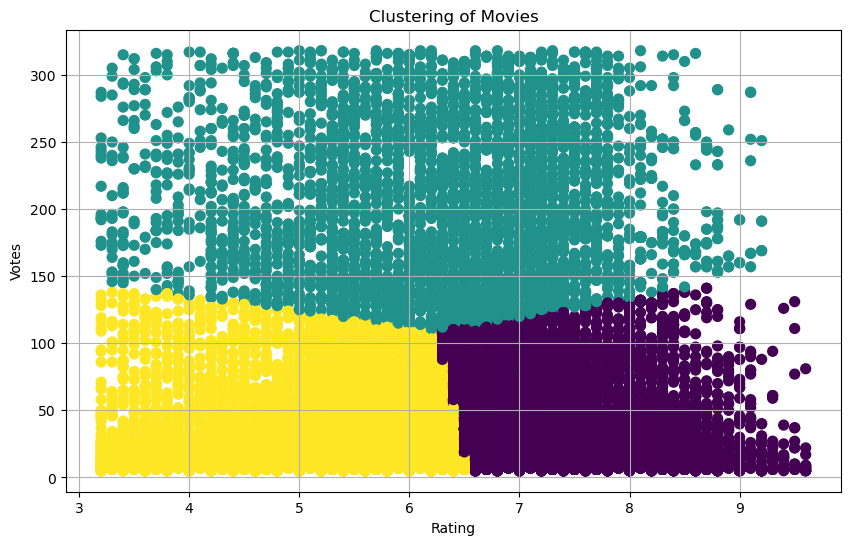

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df[['Rating', 'Votes']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Rating'], df['Votes'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Clustering of Movies')
plt.grid(True)
plt.show()


In [79]:
k_rng =range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Rating','Votes']])
    sse.append(km.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

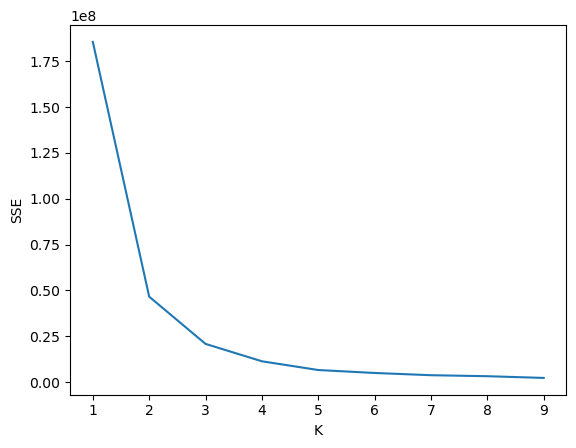

In [80]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)
plt.show

In [81]:
df.columns


Index(['ID', 'Movie_Name', 'Year', 'Timing', 'Rating', 'Votes', 'Genre',
       'Language', 'Cluster'],
      dtype='object')

In [82]:
df

,ID,Movie_Name,Year,Timing,Rating,Votes,Genre,Language,Cluster
0,tt0398974,Dr. Shaitan,1960,137.3,5.9,8,Drama,hindi,2
1,tt1702558,Nadir Khan,1968,112.3,4.8,7,Drama,urdu,2
4,tt0049595,Parivar,1956,129.5,7.4,21,"Comedy, Drama, Family",hindi,0
5,tt2930026,Humraah: The Traitor,2008,107.1,5.5,48,Thriller,hindi,2
6,tt6597160,Jacqueline I Am Coming,2019,112.0,7.9,16,Drama,hindi,0
...,...,...,...,...,...,...,...,...,...
50595,tt0229947,Aakhri Geet,1975,137.3,5.9,8,Drama,hindi,2
50597,tt2784720,Sulagte Armaan,1984,120.6,6.2,19,Drama,hindi,2
50599,tt0270221,Balayogini,1936,120.0,7.3,36,Drama,telugu,0
50600,tt0388697,Alajadi,1990,133.0,6.1,31,Drama,telugu,2


In [83]:
numerical_features = ['Year', 'Timing', 'Rating', 'Votes']
print("Missing values in numerical features:")
for col in numerical_features:
    missing_count = df[col].isnull().sum()
    print(f"{col}: {missing_count}")
X = df[numerical_features].copy()
print(f"\nFeature matrix shape: {X.shape}")
print("\nFeatures used for clustering:", numerical_features)


Missing values in numerical features:
Year: 0
Timing: 0
Rating: 0
Votes: 0

Feature matrix shape: (42470, 4)

Features used for clustering: ['Year', 'Timing', 'Rating', 'Votes']


In [84]:
le_genre = LabelEncoder()
le_language = LabelEncoder()
df['Genre_Encoded'] = le_genre.fit_transform(df['Genre'].astype(str))
df['Language_Encoded'] = le_language.fit_transform(df['Language'].astype(str))
print("Genre categories:", len(le_genre.classes_))
print("Language categories:", len(le_language.classes_))
print("Encoded features added successfully!")

Genre categories: 595
Language categories: 19
Encoded features added successfully!


## Feature Scaling - Standardizing features to have mean=0 and std=1 for better model performance

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled successfully!")
print("Scaled data shape:", X_scaled.shape)
print("\nFeature means after scaling (should be ~0):")
print(np.mean(X_scaled, axis=0).round(3))
print("\nFeature std after scaling (should be ~1):")
print(np.std(X_scaled, axis=0).round(3))


Features scaled successfully!
Scaled data shape: (42470, 4)

Feature means after scaling (should be ~0):
[ 0.  0.  0. -0.]

Feature std after scaling (should be ~1):
[1. 1. 1. 1.]


## Using K = 6 as number of clusters for this dataset as its having apt distribution among all clusters

In [86]:
k = 6 ##this value of k is chosen after checking all values from 1-8 and k = 6 gives the best distribution so k = 6 is chosen
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(f"\nCluster distribution:")
cluster_counts = df['Cluster'].value_counts().sort_index()
print(cluster_counts)
print(f"\nCluster percentage distribution:")
cluster_pct = (cluster_counts / len(df) * 100).round(2)
for cluster, pct in cluster_pct.items():
    print(f"Cluster {cluster}: {pct}% ({cluster_counts[cluster]} movies)")


Cluster distribution:
Cluster
0     8282
1     2923
2     4394
3     7596
4    11837
5     7438
Name: count, dtype: int64

Cluster percentage distribution:
Cluster 0: 19.5% (8282 movies)
Cluster 1: 6.88% (2923 movies)
Cluster 2: 10.35% (4394 movies)
Cluster 3: 17.89% (7596 movies)
Cluster 4: 27.87% (11837 movies)
Cluster 5: 17.51% (7438 movies)


In [87]:
df.shape

(42470, 11)

## Checking the characteristics of Cluster 0 and checking the most famous genre in that Cluster

In [88]:

cluster_0_data = df[df['Cluster'] == 0]
print("Cluster 0 characteristics:")
print(cluster_0_data[['Year', 'Rating', 'Votes', 'Timing']].describe())
print("\nTop genres in Cluster 0:")
print(cluster_0_data['Genre'].value_counts().head())

Cluster 0 characteristics:
              Year       Rating        Votes       Timing
count  8282.000000  8282.000000  8282.000000  8282.000000
mean   1961.653586     5.864888    16.813451   131.922664
std      15.006617     0.499376    17.271582    13.064419
min    1913.000000     3.200000     5.000000    47.000000
25%    1949.000000     5.700000     8.000000   125.100000
50%    1963.000000     5.900000    11.000000   132.900000
75%    1975.000000     6.200000    19.000000   137.300000
max    1986.000000     7.400000   193.000000   222.000000

Top genres in Cluster 0:
Genre
Drama                         4869
Action                        1327
Romance                        266
Drama, Family                  233
Drama, Romance                 147
Name: count, dtype: int64


In [89]:

cluster_1_data = df[df['Cluster'] == 1]
print("Cluster 1 characteristics:")
print(cluster_1_data[['Year', 'Rating', 'Votes', 'Timing']].describe())
print("\nTop genres in Cluster 0:")
print(cluster_1_data['Genre'].value_counts().head())

Cluster 1 characteristics:
              Year       Rating        Votes       Timing
count  2923.000000  2923.000000  2923.000000  2923.000000
mean   2012.582278     7.780226    59.483407    32.320972
std       7.696701     0.716429    63.756853    22.186793
min    1920.000000     4.400000     5.000000     1.000000
25%    2009.000000     7.400000    13.000000    14.600000
50%    2015.000000     7.900000    29.000000    23.000000
75%    2018.000000     8.200000    83.000000    48.200000
max    2021.000000     9.600000   316.000000    88.000000

Top genres in Cluster 0:
Genre
Short, Drama                      387
Drama                             313
Short                             177
Documentary, Short                177
Adventure, Fantasy                169
Name: count, dtype: int64


## Analyzing Each clusters to check how well the data is distributed among all the Clusters

In [90]:
def analyze_clusters(df, numerical_features):
    cluster_stats = df.groupby('Cluster')[numerical_features].agg(['mean', 'median', 'std']).round(2)
    return cluster_stats
cluster_analysis = analyze_clusters(df, numerical_features)
print("CLUSTER STATISTICAL ANALYSIS")
print(cluster_analysis)
print("DETAILED CLUSTER CHARACTERISTICS")
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\n CLUSTER {cluster} ({len(cluster_data)} movies, {len(cluster_data)/len(df)*100:.1f}%)")
    print(f"    Year: {cluster_data['Year'].mean():.1f} ± {cluster_data['Year'].std():.1f}")
    print(f"     Duration: {cluster_data['Timing'].mean():.1f} ± {cluster_data['Timing'].std():.1f} minutes")
    print(f"    Rating: {cluster_data['Rating'].mean():.2f} ± {cluster_data['Rating'].std():.2f}")
    print(f"    Votes: {cluster_data['Votes'].mean():.0f} ± {cluster_data['Votes'].std():.0f}")
    top_genre = cluster_data['Genre'].mode().iloc[0] if len(cluster_data) > 0 else "N/A"
    top_language = cluster_data['Language'].mode().iloc[0] if len(cluster_data) > 0 else "N/A"
    print(f"    Top Genre: {top_genre}")
    print(f"    Top Language: {top_language}")

CLUSTER STATISTICAL ANALYSIS
            Year                 Timing               Rating               \
            mean  median    std    mean median    std   mean median   std   
Cluster                                                                     
0        1961.65  1963.0  15.01  131.92  132.9  13.06   5.86    5.9  0.50   
1        2012.58  2015.0   7.70   32.32   23.0  22.19   7.78    7.9  0.72   
2        2003.50  2009.0  16.36  130.63  130.6  25.36   6.27    6.4  1.06   
3        2011.80  2014.0   7.23  121.29  122.0  18.25   7.09    7.1  0.66   
4        2002.83  2003.0  11.51  127.99  129.3  16.02   5.30    5.5  0.70   
5        1976.71  1979.0  12.00  134.82  134.4  30.40   7.10    7.0  0.60   

          Votes                
           mean median    std  
Cluster                        
0         16.81   11.0  17.27  
1         59.48   29.0  63.76  
2        212.52  203.0  52.50  
3         50.93   41.0  37.78  
4         35.25   22.0  30.74  
5         32.73   19.

## PCA Visualization - Reducing dimensionality to 2D and plotting clusters with explained variance ratios

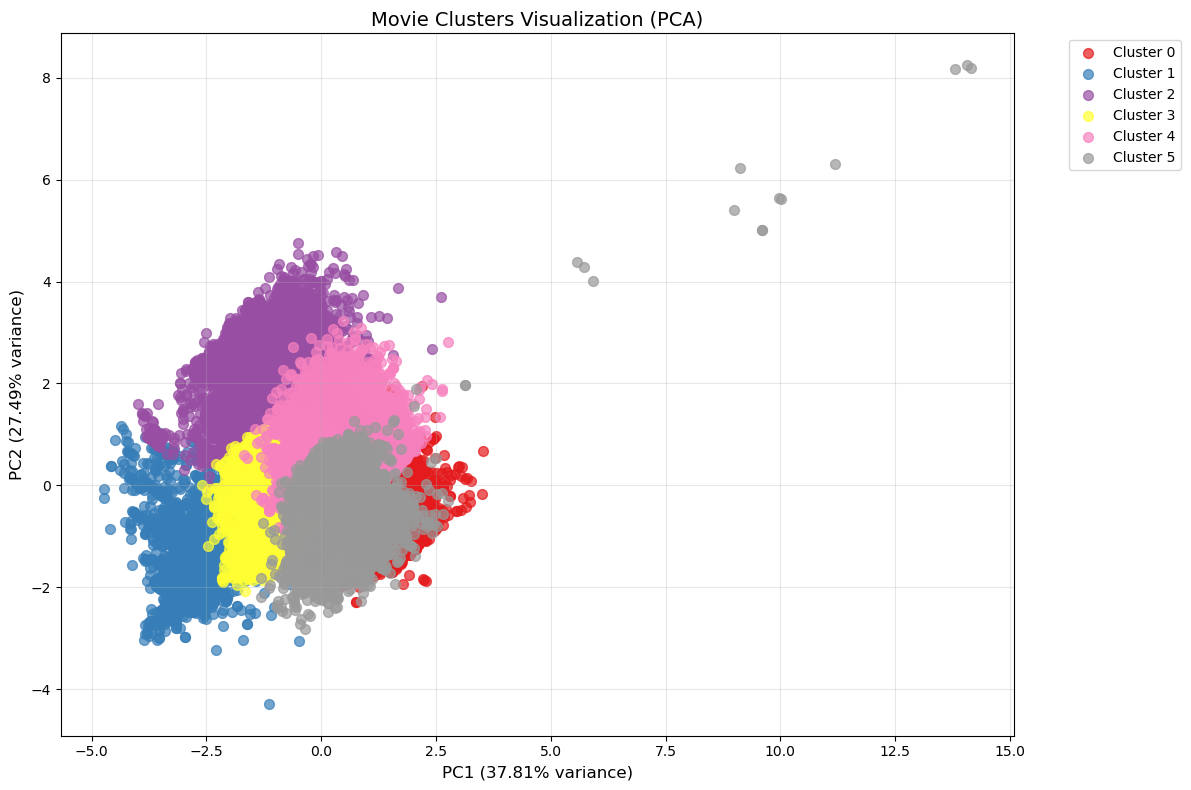

PCA Explained Variance Ratio: [0.37808788 0.2749482 ]
Total Variance Explained: 65.30%


In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 8))
colors = plt.cm.Set1(np.linspace(0, 1, 6))
for i in range(6):
    cluster_mask = df['Cluster'] == i
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], 
               c=[colors[i]], label=f'Cluster {i}', alpha=0.7, s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Movie Clusters Visualization (PCA)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.2%}")

#### The first two principal components as shown above capture 65.30% of the total variance in the data, with PC1 explaining 37.81% and PC2 explaining 27.49% - this indicates a reasonable dimensionality reduction for visualization while retaining most of the data's information.

## Cluster Characteristics Heatmap - Visualizing average feature values across clusters to understand what makes each cluster unique

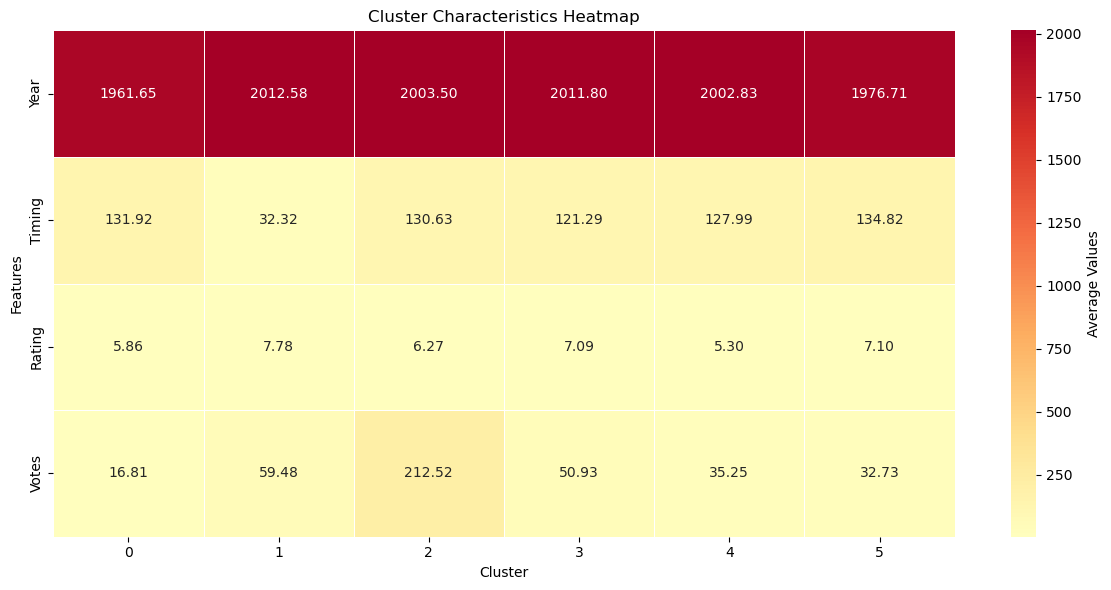

In [92]:
import seaborn as sns
cluster_means = df.groupby('Cluster')[numerical_features].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', cbar_kws={'label': 'Average Values'},
            linewidths=0.5)
plt.title('Cluster Characteristics Heatmap', fontsize=12)
plt.xlabel('Cluster', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.tight_layout()
plt.show()


## From the Cluster Characteristics Heatmap the following insights can be drawn
- **Cluster 0:** Old classics (1960s, low ratings, minimal votes)
- **Cluster 1:** Modern high-quality shortfilms (2010s, high ratings, moderate votes) 
- **Cluster 2:** Typical Mainstream Movies (2000s, average ratings, high votes)
- **Cluster 3:** Recent Releases(2010s, good ratings, low votes)
- **Cluster 4:** Early 2000s not so known movies (2000s, lowest ratings, minimal votes)
- **Cluster 5:** Vintage films (1970s, good ratings, low votes)

## Normalized Cluster Heatmap - Standardized feature values to better compare relative differences between clusters across all features

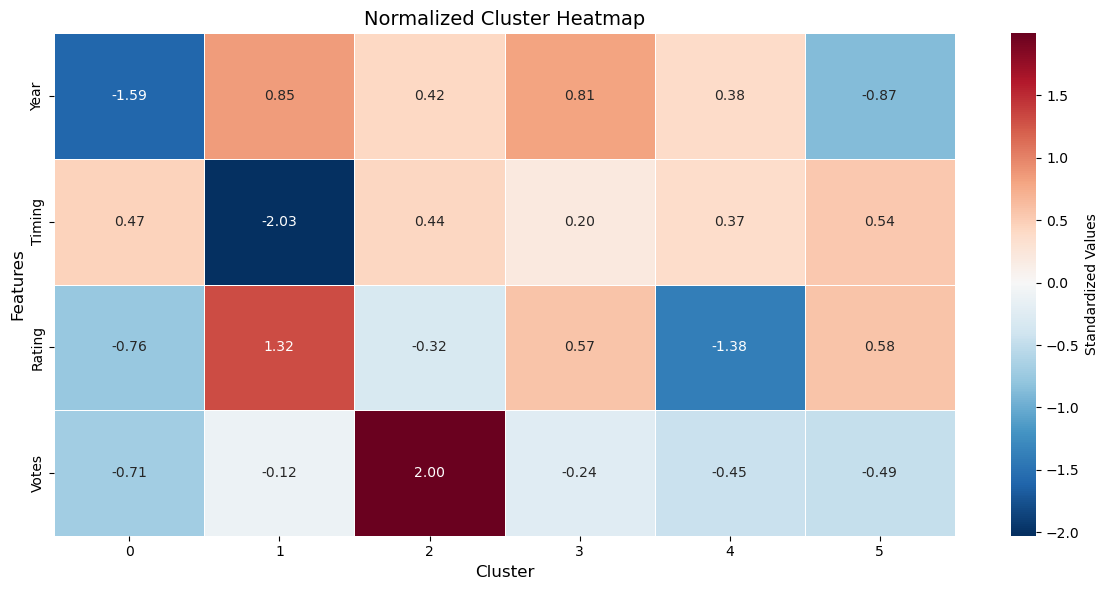

In [93]:
cluster_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_normalized.T, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', cbar_kws={'label': 'Standardized Values'},
            linewidths=0.5)
plt.title('Normalized Cluster Heatmap', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

**Key Insights from Heatmap:**
- **Cluster 0:** Significantly older films (-1.59 years) with below-average ratings and votes
- **Cluster 1:** Short duration films (-2.03 timing) with higher ratings but recent releases
- **Cluster 2:** Highest votes (2.00) telling mainstream popular with average other values
- **Cluster 3:** Above-average in most features (year, rating) telling quality recent releases
- **Cluster 4:** Lowest ratings (-1.38) representing bad quality content
- **Cluster 5:** Older films (-0.87 years) but with good ratings, representing vintage classics movies

The normalization reveals **Cluster 2** as the most successful (highest votes), **Cluster 1** as short-form movies, and **Clusters 0 & 5** representing old era of cinema.

## Rating vs Year Scatter Plot - Visualizing temporal distribution and rating patterns across different movie clusters

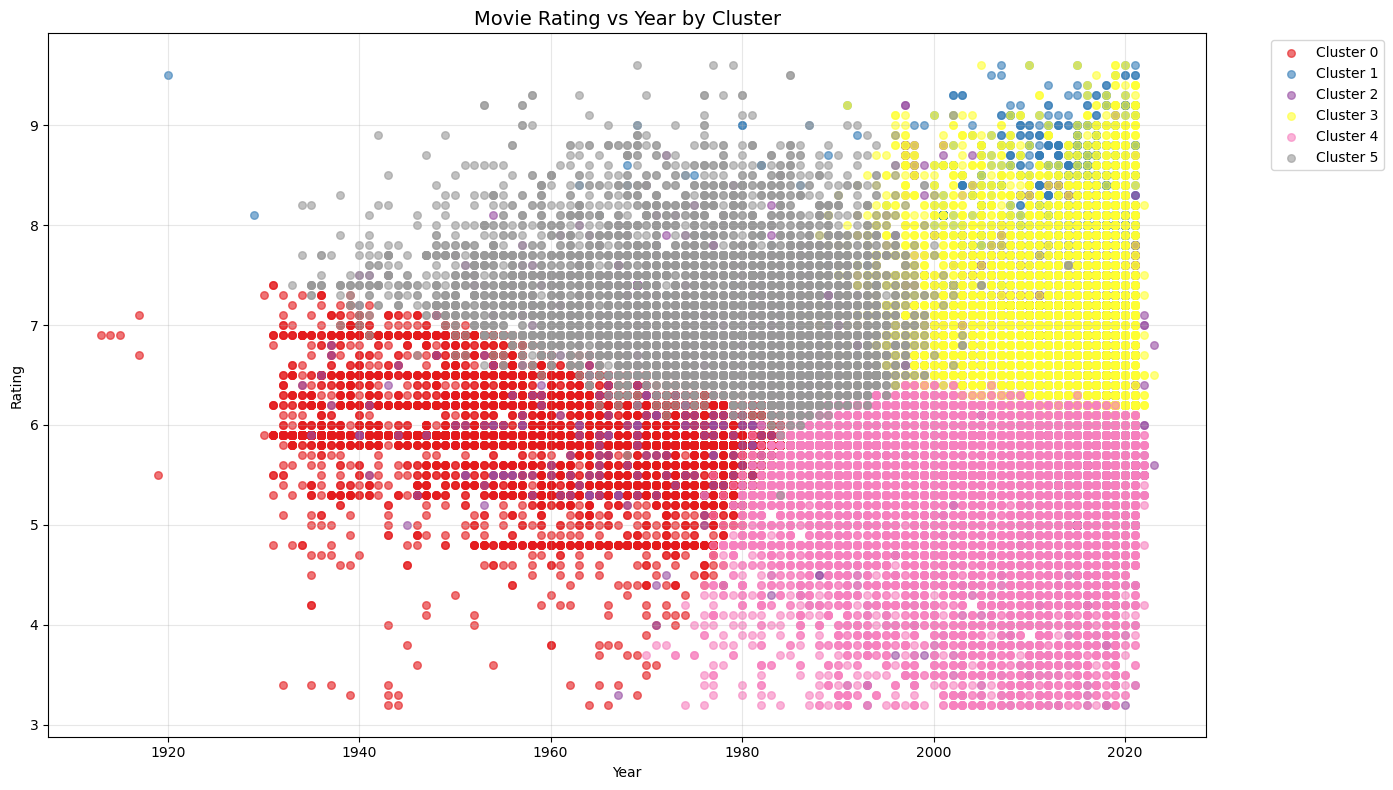

In [94]:
plt.figure(figsize=(14, 8))
colors = plt.cm.Set1(np.linspace(0, 1, 6))
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Year'], cluster_data['Rating'], 
               c=[colors[cluster]], label=f'Cluster {cluster}', 
               alpha=0.6, s=30)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.title('Movie Rating vs Year by Cluster', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Rating Trends Over Time - Adding linear  trend line to identify rating patterns and temporal changes within each cluster

C:\Users\SOUBHIK\AppData\Local\Temp\ipykernel_2052\1581899486.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


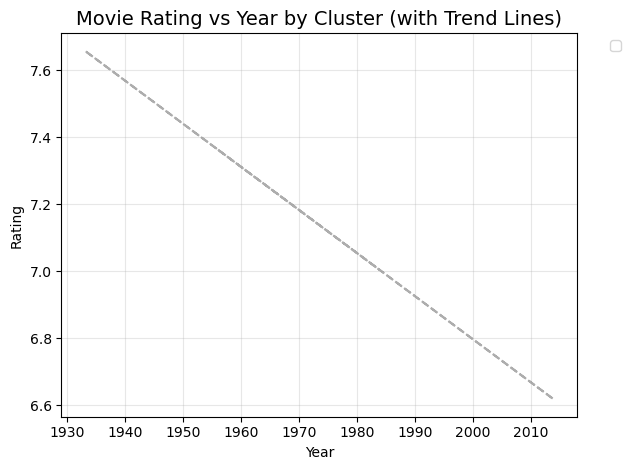

In [95]:
z = np.polyfit(cluster_data['Year'], cluster_data['Rating'], 1)
p = np.poly1d(z)
plt.plot(cluster_data['Year'], p(cluster_data['Year']), 
             color=colors[cluster], linestyle='--', alpha=0.8)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.title('Movie Rating vs Year by Cluster (with Trend Lines)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Looking at this trend line, it shows a declining rating pattern over time (from ~7.6 in 1930 to ~6.6 in 2010)

## Cluster Feature Distributions - Box plots comparing rating, duration, votes, and year distributions across all clusters

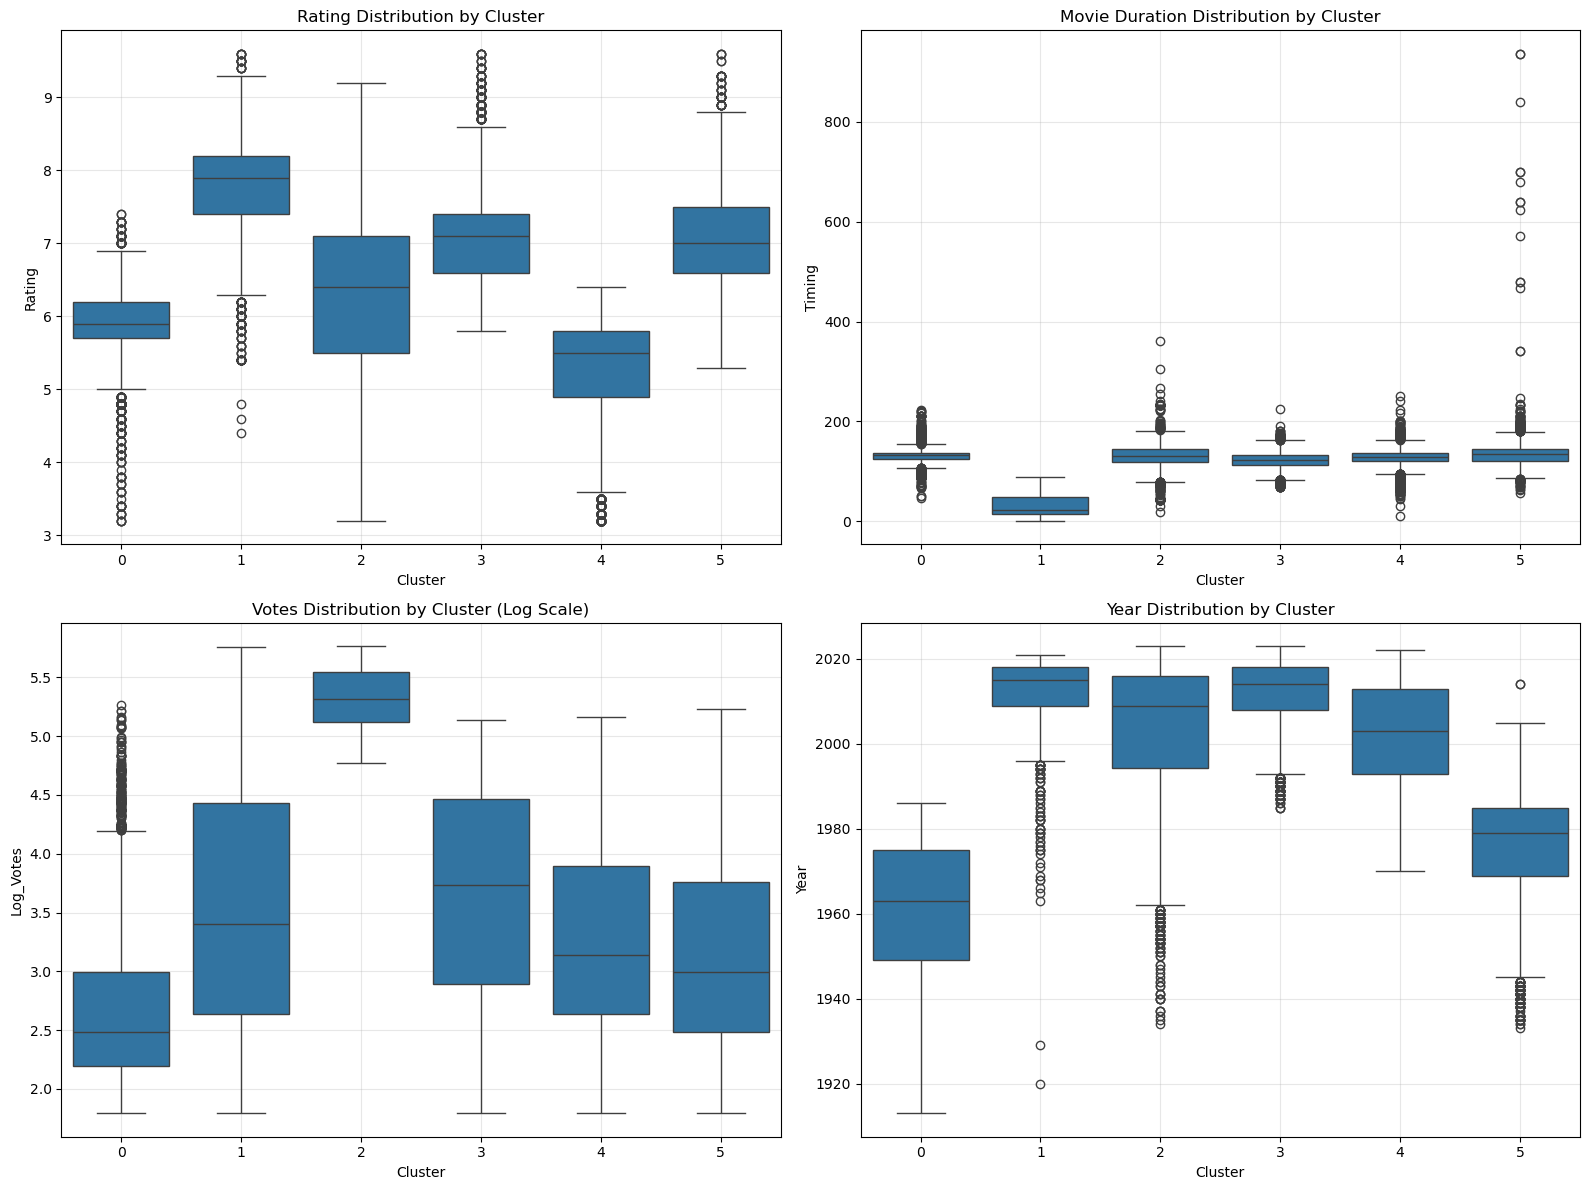

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(data=df, x='Cluster', y='Rating', ax=axes[0,0])
axes[0,0].set_title('Rating Distribution by Cluster', fontsize=12)
axes[0,0].grid(True, alpha=0.3)
sns.boxplot(data=df, x='Cluster', y='Timing', ax=axes[0,1])
axes[0,1].set_title('Movie Duration Distribution by Cluster', fontsize=12)
axes[0,1].grid(True, alpha=0.3)
df['Log_Votes'] = np.log1p(df['Votes'])
sns.boxplot(data=df, x='Cluster', y='Log_Votes', ax=axes[1,0])
axes[1,0].set_title('Votes Distribution by Cluster (Log Scale)', fontsize=12)
axes[1,0].grid(True, alpha=0.3)
sns.boxplot(data=df, x='Cluster', y='Year', ax=axes[1,1])
axes[1,1].set_title('Year Distribution by Cluster', fontsize=12)
axes[1,1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Key Insights from Box Plots:**
- **Cluster 1:** Highest rating medians (~7.8) with very short durations (<50 min), representing high-quality short movies
- **Cluster 0 & 4:** Lowest ratings (~5.5-6.0) from different eras (1960s vs 2000s), indicating lower-quality content across eras
- **Cluster 2:** Highest vote engagement (log scale ~5.5) with wide year spread, representing mainstream popular films with higher audience reach
- **Duration pattern:** Most clusters have around 120-140 minutes except **Cluster 1's** short movies, showing standard feature-length preferences
- **Temporal clustering:** Clear year-based separation with **Clusters 0&5** (vintage), **1&3** (modern), and **2&4** (transitional periods)
- **Rating consistency:** **Clusters 3&5** show similar high rating ranges (~7.0-7.5) despite being from different eras, suggesting consistent quality standards

## Genre Distribution Heatmap - Percentage breakdown of top 20 genres across clusters to identify genre preferences within each cluster

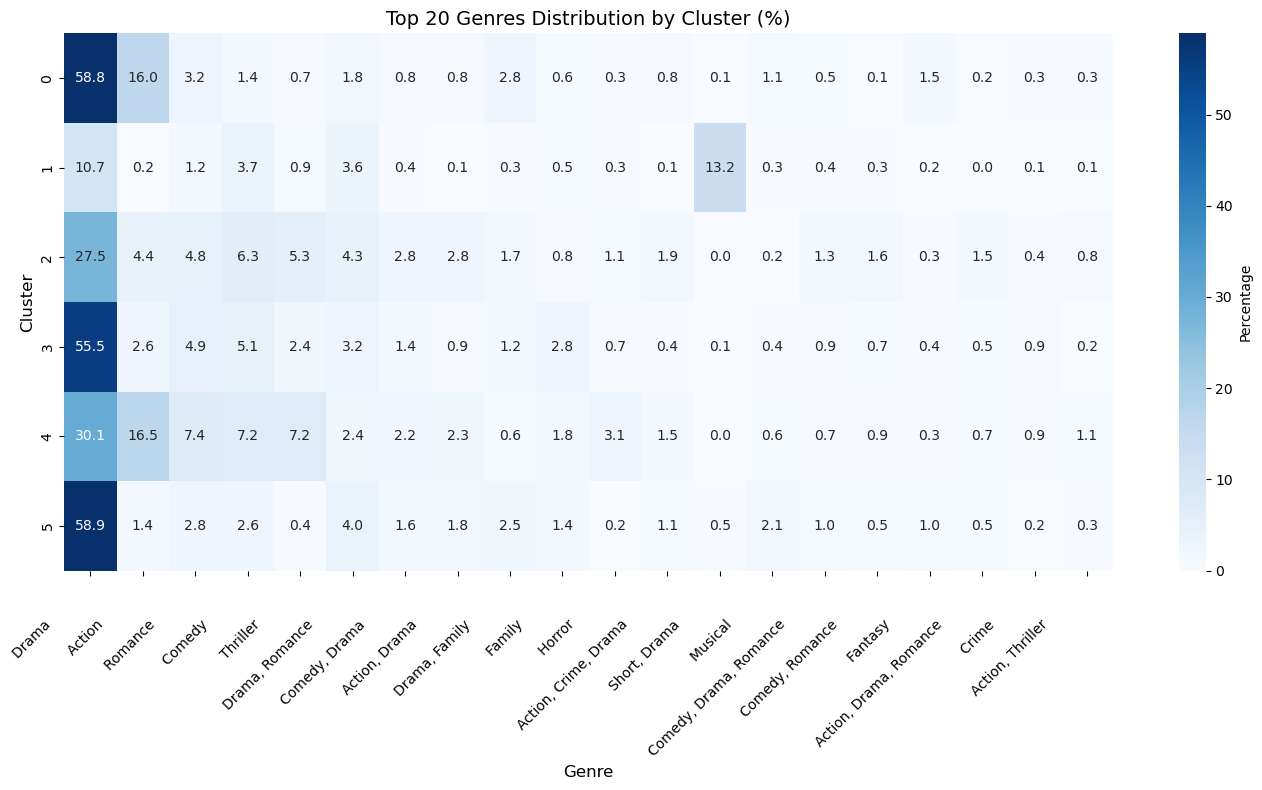

In [97]:
plt.figure(figsize=(14, 8))
genre_cluster = pd.crosstab(df['Cluster'], df['Genre'])
genre_cluster_pct = genre_cluster.div(genre_cluster.sum(axis=1), axis=0) * 100
top_genres = df['Genre'].value_counts().head(20).index
sns.heatmap(genre_cluster_pct[top_genres], annot=True, fmt='.1f', 
            cmap='Blues', cbar_kws={'label': 'Percentage'})
plt.title('Top 20 Genres Distribution by Cluster (%)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Key Insights from Distribution Heatmap:**
- **Cluster 0**,**Cluster 3**,**Cluster 5**,**Cluster 4** : These Clusters Mainly consist of the Genre drama with over 50% of the overall genre while **Cluster 0,Cluster 4** has Action as the second highest percentage **Cluster 5** is divided among all other genres after drama
- **Cluster 1:** This Cluster is divided almost equally among all the genre while having Short,Drama as the most occured Genre in it and Drama Being the second highest 

The Heatmap reveals that the most occured Genre in the dataset is Drama followed by action, romance and comedy and *Cluster 1* consisting of the genre of Short,Drama

## Language Distribution Heatmap - Percentage breakdown of top 10 languages across clusters to identify regional/linguistic patterns within each cluster

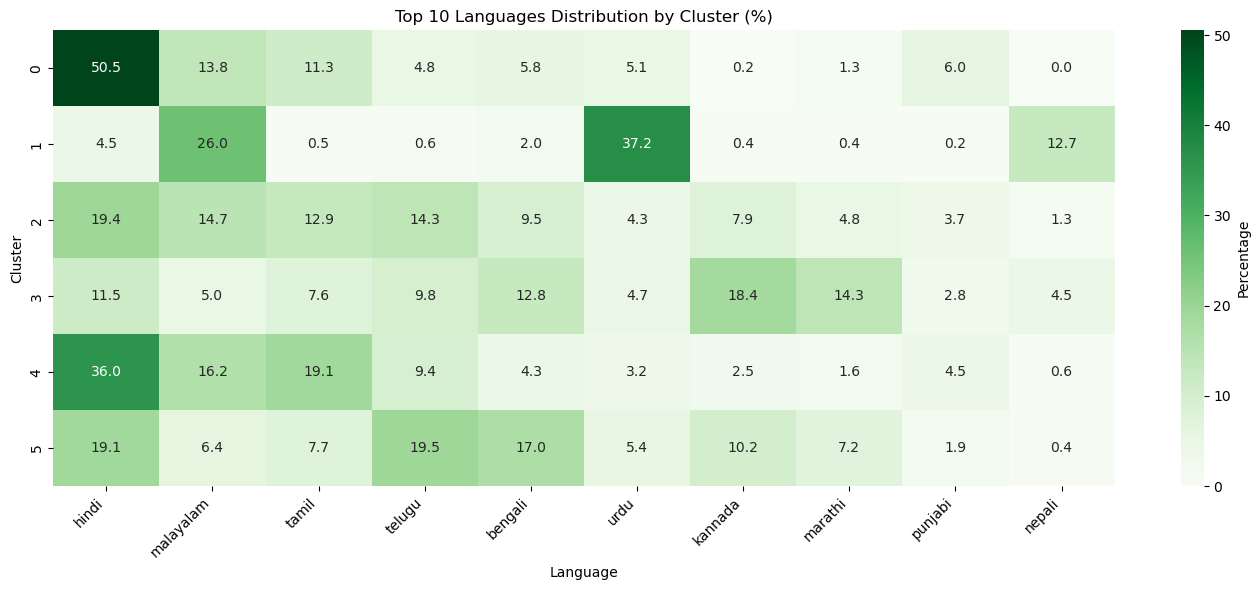

In [98]:
plt.figure(figsize=(14, 6))
language_cluster = pd.crosstab(df['Cluster'], df['Language'])
language_cluster_pct = language_cluster.div(language_cluster.sum(axis=1), axis=0) * 100
top_languages = df['Language'].value_counts().head(10).index
sns.heatmap(language_cluster_pct[top_languages], annot=True, fmt='.1f', 
            cmap='Greens', cbar_kws={'label': 'Percentage'})
plt.title('Top 10 Languages Distribution by Cluster (%)', fontsize=12)
plt.xlabel('Language', fontsize=10)
plt.ylabel('Cluster', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Key Insights From The Heatmap:**
- **Cluster 0**:Hindi Core Classics(Very high Hindi percentage (50.5%) compared to other languages)
- **Cluster 1**:Southern Hidden Gems(Malayalam is strongest here (26.0%), other languages minimal)
- **Cluster 2**:Mainstream Mix(No single dominant language; mix of Tamil, Telugu, Bengali, Kannada)
- **Cluster 3**:South-Indian Mainstream(Telugu and Tamil both have good representation (13.3%, 12.9%))
- **Cluster 4**:Hindi-Regional Blend(High Hindi (36.0%) and Tamil (19.1%) together dominate)
- **Cluster 5**:Bengali-Urdu Focus(Bengali (17.0%) and Urdu (5.4%) are relatively high here)

## 3D Cluster Visualization - Interactive 3D scatter plot showing relationship between Year, Rating, and Vote count across all clusters

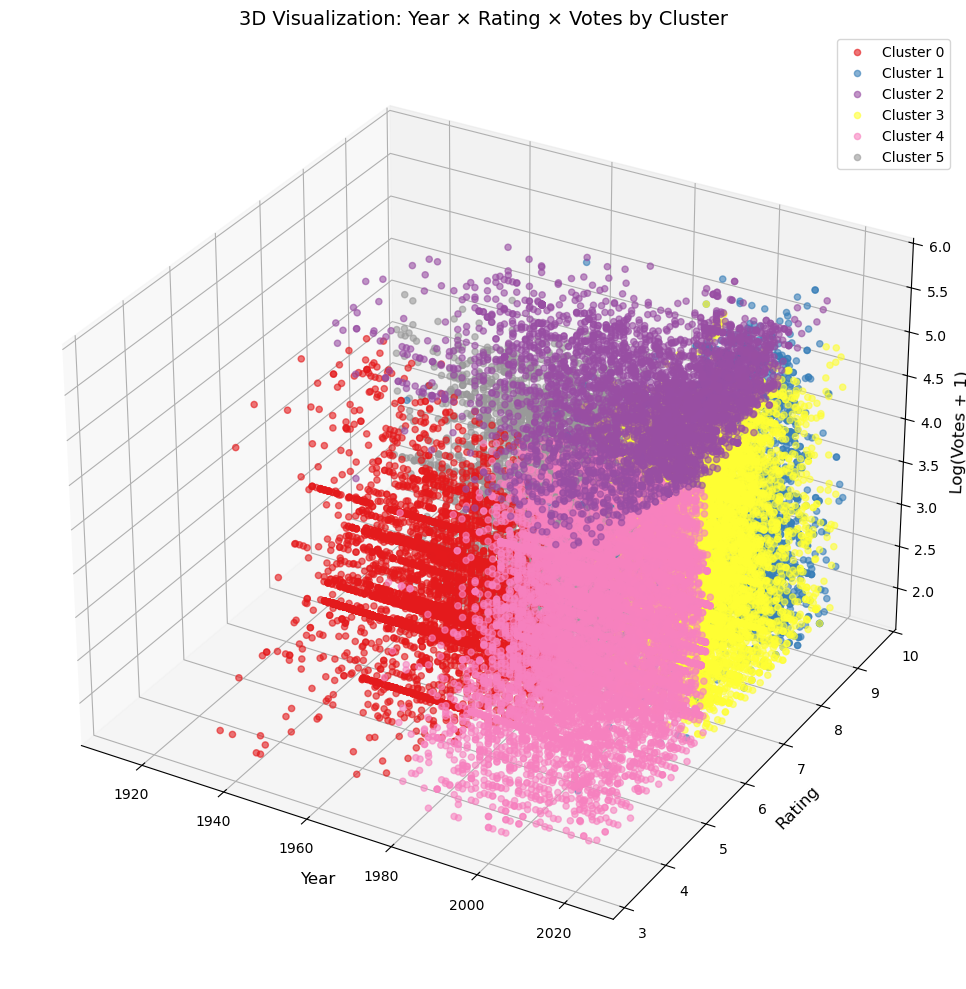

In [99]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.Set1(np.linspace(0, 1, 6))
for i in range(6):
    cluster_data = df[df['Cluster'] == i]
    ax.scatter(cluster_data['Year'], cluster_data['Rating'], 
              np.log1p(cluster_data['Votes']), 
              c=[colors[i]], label=f'Cluster {i}', alpha=0.6, s=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)
ax.set_zlabel('Log(Votes + 1)', fontsize=12)
ax.set_title('3D Visualization: Year × Rating × Votes by Cluster', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()

## Feature Importance Analysis - Ranking features by their average absolute cluster center values to identify which features most distinguish the clusters

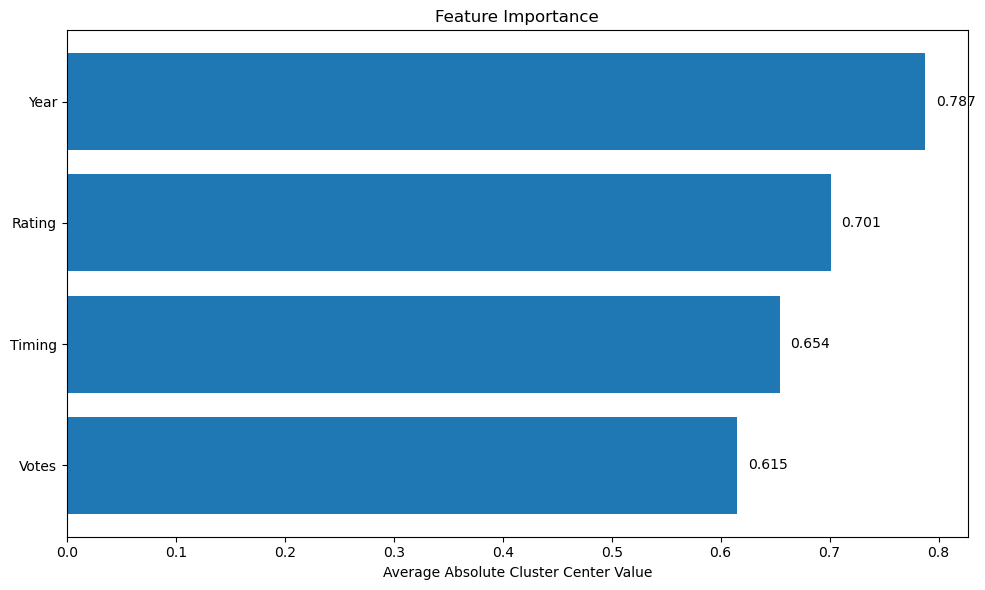

Feature Importance Rankings:
1. Year: 0.787
2. Rating: 0.701
3. Timing: 0.654
4. Votes: 0.615


In [100]:
feature_importance = np.abs(kmeans.cluster_centers_).mean(axis=0)
feature_names = numerical_features
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
bars = plt.barh(range(len(feature_names)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Average Absolute Cluster Center Value', fontsize=10)
plt.title('Feature Importance', fontsize=12)
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center')
plt.tight_layout()
plt.show()
print("Feature Importance Rankings:")
for i, idx in enumerate(sorted_idx[::-1]):
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.3f}")

#### Insights from Feature Importance Rankings:
- **Year** (0.787)  
   The most influential feature. This indicates that the release year has the strongest impact between the clusters
- **Rating** (0.701)  
   The second most important feature, suggesting that user ratings play a major role in distuinguishing between the clusters.
- **Timing** (0.654)  
   Moderately important,showing  temporal characteristics such as duration.
- **Votes** (0.615)  
   The least important among the four, though still contributing in the cluster formation

## Cluster Summary & Characterization - Analyzing each cluster's size, temporal era, quality rating, and popularity to create descriptive profiles

In [101]:
from sklearn.metrics import silhouette_score
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    size_pct = len(cluster_data) / len(df) * 100
    avg_year = cluster_data['Year'].mean()
    avg_rating = cluster_data['Rating'].mean()
    avg_votes = cluster_data['Votes'].mean()
    top_language = cluster_data['Language'].mode()[0] if len(cluster_data['Language'].mode()) > 0 else 'Unknown'
    era = "Modern" if avg_year > 2000 else "Classic"
    quality = "High-rated" if avg_rating > df['Rating'].mean() else "Average-rated"
    popularity = "Popular" if avg_votes > df['Votes'].median() else "Niche"
    print(f"\n   Cluster {cluster}: {len(cluster_data)} movies ({size_pct:.1f}%)")
    print(f" -> {era} {quality} {popularity} films")
    print(f" -> Era: {avg_year:.0f}s, Rating: {avg_rating:.1f}/10, Votes: {avg_votes:,.0f}")
    print(f" ->Top Language: {top_language}")


   Cluster 0: 8282 movies (19.5%)
 -> Classic Average-rated Niche films
 -> Era: 1962s, Rating: 5.9/10, Votes: 17
 ->Top Language: hindi

   Cluster 1: 2923 movies (6.9%)
 -> Modern High-rated Popular films
 -> Era: 2013s, Rating: 7.8/10, Votes: 59
 ->Top Language: urdu

   Cluster 2: 4394 movies (10.3%)
 -> Modern Average-rated Popular films
 -> Era: 2004s, Rating: 6.3/10, Votes: 213
 ->Top Language: hindi

   Cluster 3: 7596 movies (17.9%)
 -> Modern High-rated Popular films
 -> Era: 2012s, Rating: 7.1/10, Votes: 51
 ->Top Language: kannada

   Cluster 4: 11837 movies (27.9%)
 -> Modern Average-rated Popular films
 -> Era: 2003s, Rating: 5.3/10, Votes: 35
 ->Top Language: hindi

   Cluster 5: 7438 movies (17.5%)
 -> Classic High-rated Popular films
 -> Era: 1977s, Rating: 7.1/10, Votes: 33
 ->Top Language: telugu


## Clustering Conclusion
The clustering analysis has successfully segmented the movies into **6 distinct groups** based on **era, rating, and popularity (votes)**. Below is a summary of the insights derived from each cluster:
- **Cluster 0 (19.5%)**:  
  *Classic Average-rated Hindi Niche films*  
  → Primarily from the 1960s, with moderate ratings (5.9/10) and low vote counts (17), representing older, lesser-known titles.
- **Cluster 1 (6.9%)**:  
  *Modern High-rated Popular films*  
  → Recent releases (2010s) with high ratings (7.8/10) and relatively high popularity (59 votes), though a smaller group in terms of count and having language as urdu in it 
- **Cluster 2 (10.3%)**:  
  *Modern Average-rated Popular films*  
  → Films from the 2000s with ratings (6.3/10) but high popularity (213 votes), indicating widely watched but moderately received titles.
- **Cluster 3 (17.9%)**:  
  *Modern High-rated Popular films*  
  → Similar to Cluster 1, but with slightly lower ratings (7.1/10) with kannada movies in the cluster
- **Cluster 4 (27.9%)**:  
  *Modern Average-rated Popular films*  
  → The largest cluster, featuring movies from the 2000s with lower to average ratings (5.3/10) and average popularity (35 votes).
- **Cluster 5 (17.5%)**:  
  *Classic High-rated Popular films*  
  → Older titles from the 1970s with high ratings (7.1/10) and average popularity (33 votes), reflecting audience appreciation and from the telugu language
#### Key Takeaways:
- The **era**  appears to be a major differentiator across clusters, as shown in the feature importance finding.
- Ratings and votes further define popularity and distinguishing between niche, average, and high-performing movies.
- Clusters highlight both **temporal trends** and **audience preferences**, making the segmentation useful for recommendation systems,analysis, or targeted strategies.
- Language adds another important feature of distinction between the  clusters, revealing regional trends in movie popularity.
- **Hindi** films dominate in the clusters  but vary in eras
